In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bangladeshis-flower/Kamini/img_aug_370_hflip.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_45_zoom.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_407_vflip.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_367_vflip.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_3_vflip.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_origonly_535_orig.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_245_hflip.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_319_zoom.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_310_zoom.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_80_hflip.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_372_orig.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_294_orig.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_315_zoom.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_94_hflip.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_428_orig.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_170_hflip.jpg


In [2]:
pip install tensorflow==2.15.0  

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: ml-dtypes
    

In [3]:
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image
# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

2025-06-03 09:23:25.883081: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-03 09:23:25.883146: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-03 09:23:25.884773: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


modules loaded


In [4]:
import os
import pandas as pd

data_dir = '/kaggle/input/bangladeshis-flower'
filepaths = []
labels = []

# Traverse all subdirectories recursively
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            fpath = os.path.join(root, file)
            # Extract top-level folder name as label
            relative_path = os.path.relpath(fpath, data_dir)
            label = relative_path.split(os.sep)[0]  # always the first folder after data_dir
            filepaths.append(fpath)
            labels.append(label)

# Create dataframe
df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})
print("✅ Total images found:", len(df))
print("📂 Unique labels:", df['labels'].unique())


✅ Total images found: 20000
📂 Unique labels: ['Kamini' 'Rainlily' 'Sondhamaloti' 'Kolaboti' 'Madhobilota' 'Gondhoraj'
 'Kathgulap' 'Noyontara' 'Zinnia' 'Belly']


In [5]:
df

filepaths  labels
0      /kaggle/input/bangladeshis-flower/Kamini/img_a...  Kamini
1      /kaggle/input/bangladeshis-flower/Kamini/img_a...  Kamini
2      /kaggle/input/bangladeshis-flower/Kamini/img_a...  Kamini
3      /kaggle/input/bangladeshis-flower/Kamini/img_a...  Kamini
4      /kaggle/input/bangladeshis-flower/Kamini/img_a...  Kamini
...                                                  ...     ...
19995  /kaggle/input/bangladeshis-flower/Belly/aug_im...   Belly
19996  /kaggle/input/bangladeshis-flower/Belly/aug_im...   Belly
19997  /kaggle/input/bangladeshis-flower/Belly/aug_im...   Belly
19998  /kaggle/input/bangladeshis-flower/Belly/aug_im...   Belly
19999  /kaggle/input/bangladeshis-flower/Belly/aug_im...   Belly

[20000 rows x 2 columns]

In [6]:
train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123)

# valid and test dataframe
valid_df, test_df = train_test_split(dummy_df,  train_size= 0.6, shuffle= True, random_state= 123)

**Split dataset into train, test, validate**

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Image and batch settings
batch_size = 64
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Use a dummy preprocessing function (you can add augmentation later here)
def scalar(img):
    return img

# Initialize data generators
tr_gen = ImageDataGenerator(preprocessing_function=scalar)
ts_gen = ImageDataGenerator(preprocessing_function=scalar)

# Train generator
train_gen = tr_gen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

# Validation generator
valid_gen = ts_gen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

# Test batch size logic (customized to keep batch size ≤ 80 and divide test set evenly)
ts_length = len(test_df)
test_batch_size = max([
    ts_length // n for n in range(1, ts_length + 1)
    if ts_length % n == 0 and ts_length / n <= 80
])
test_steps = ts_length // test_batch_size

# Test generator (no shuffle)
test_gen = ts_gen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=test_batch_size
)

print(f"✅ Test set has {ts_length} samples — using batch size {test_batch_size} and steps {test_steps}")


Found 16000 validated image filenames belonging to 10 classes.
Found 2400 validated image filenames belonging to 10 classes.
Found 1600 validated image filenames belonging to 10 classes.
✅ Test set has 1600 samples — using batch size 80 and steps 20


**Display 25 image**

Fetched batch of 64 images


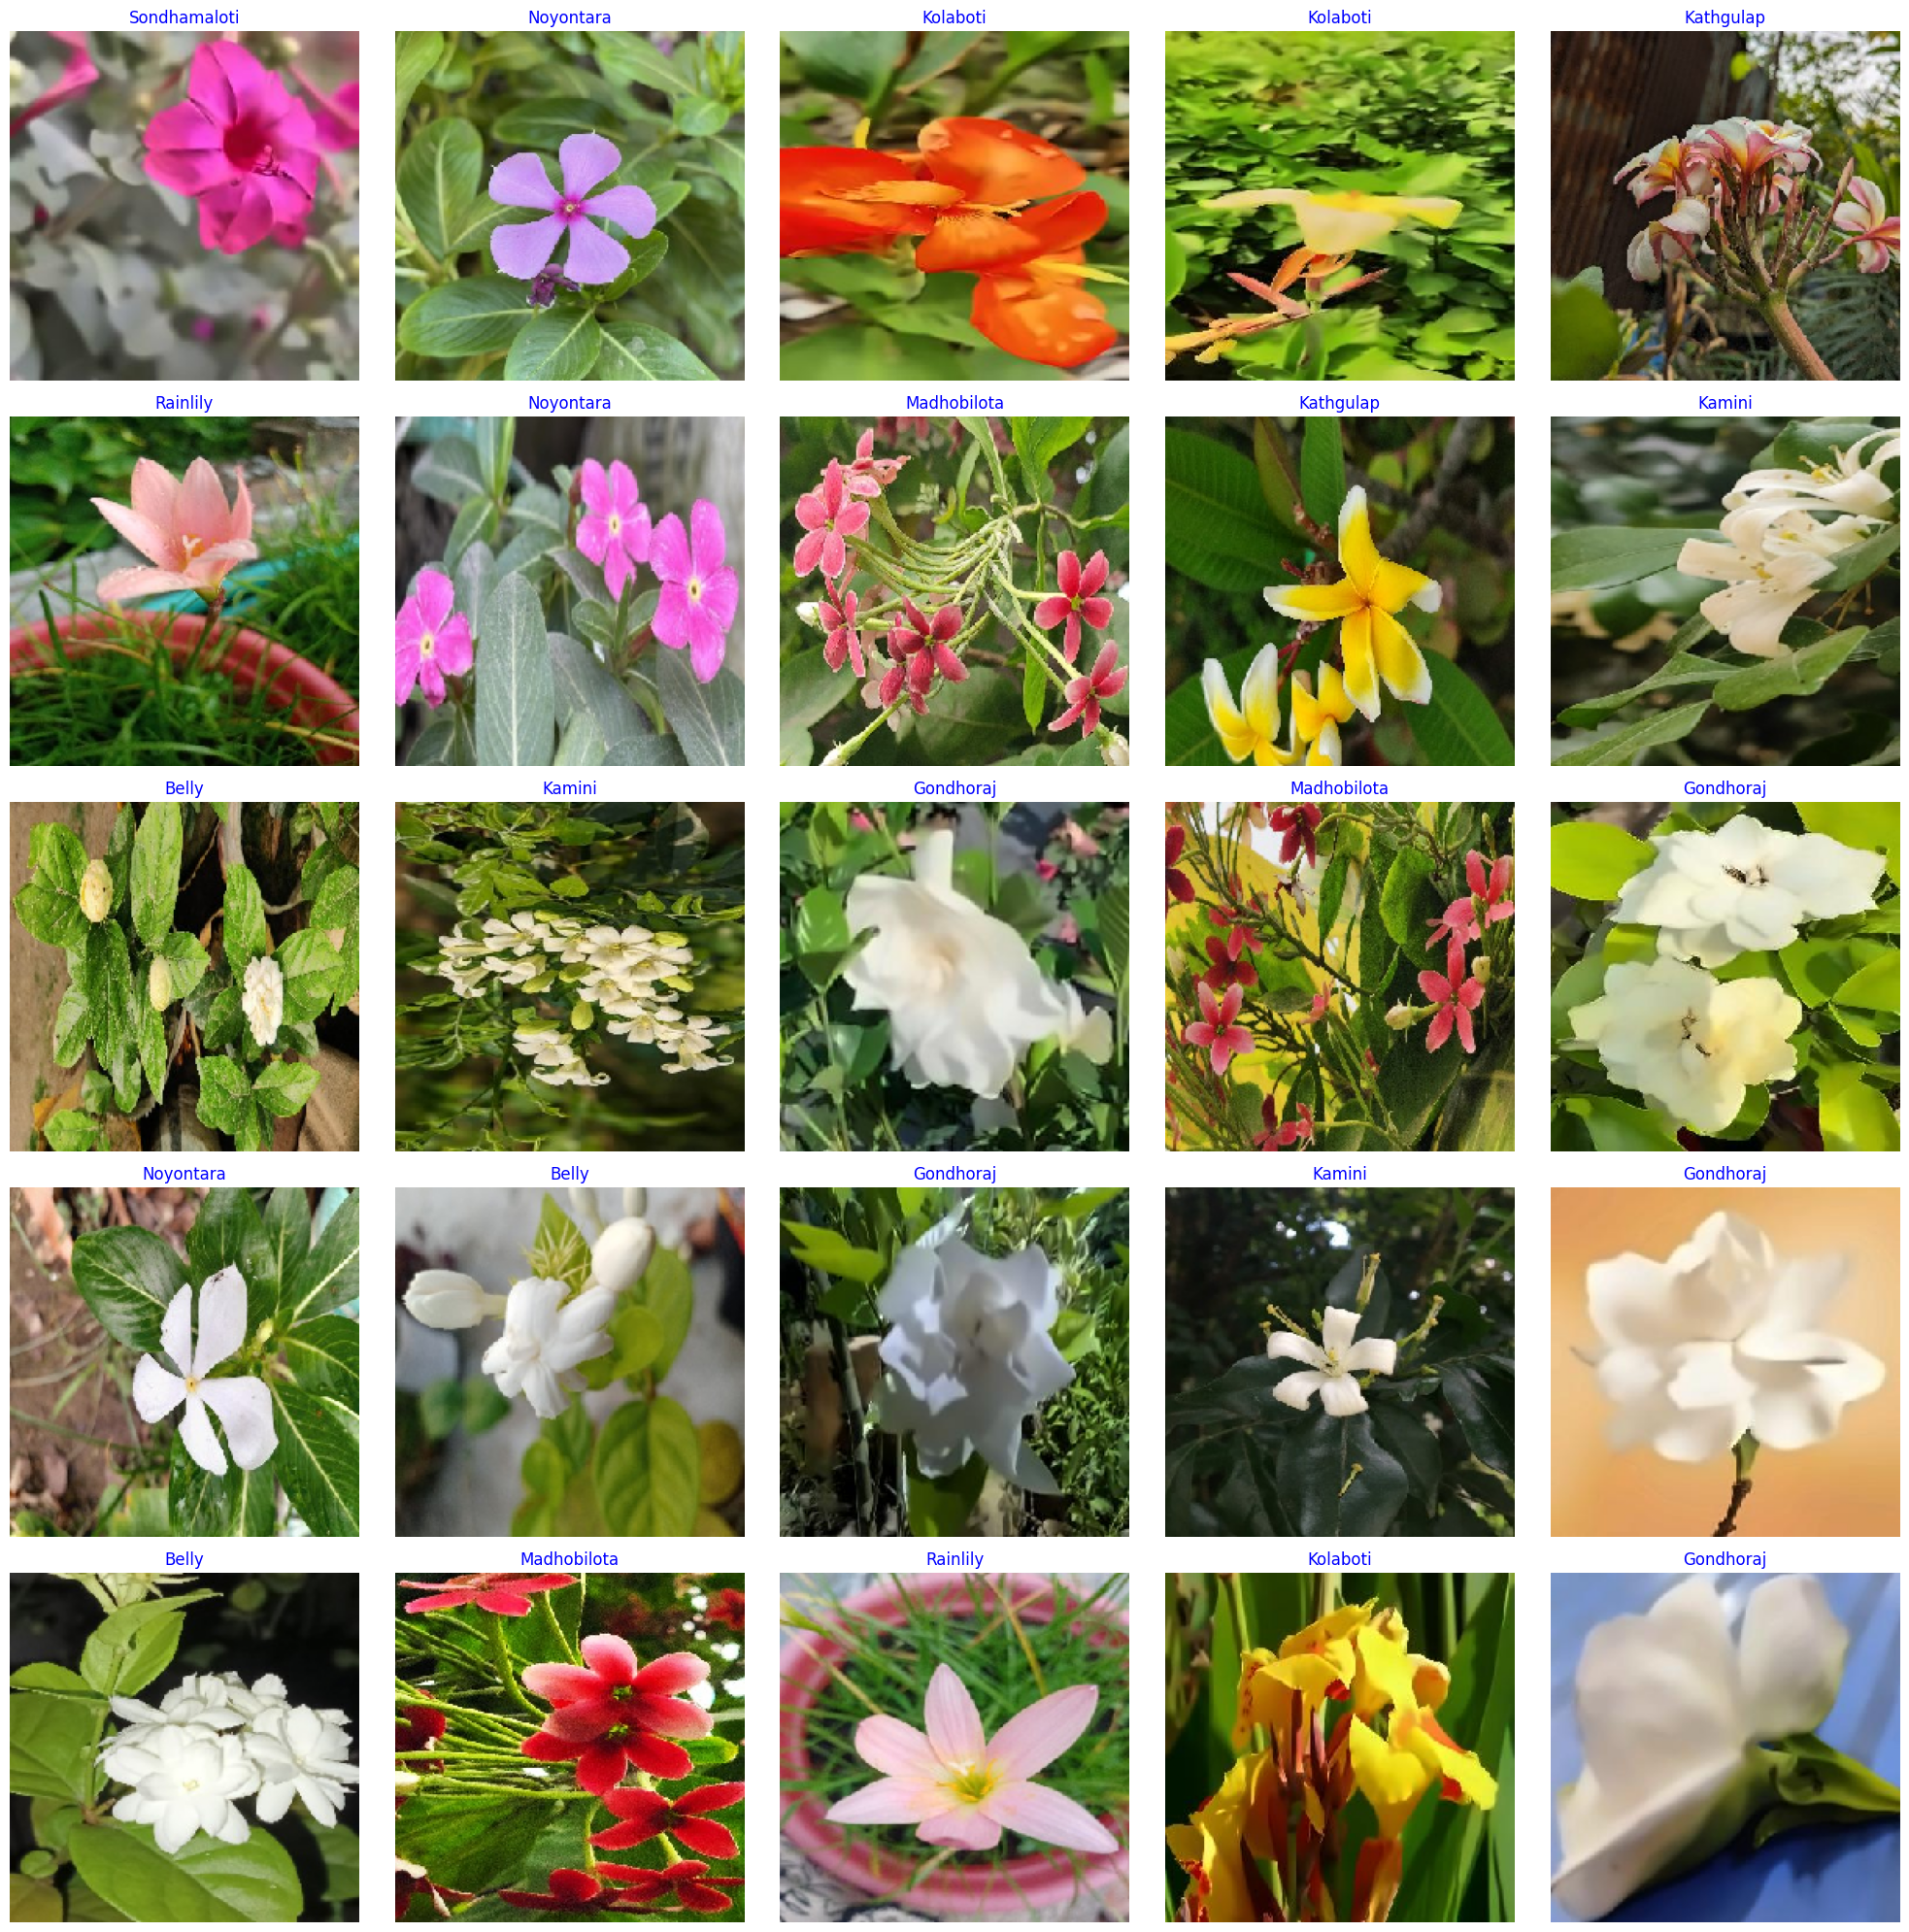

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Reset generator to avoid StopIteration
train_gen.reset()

# Get class dictionary and class names
g_dict = train_gen.class_indices
classes = list(g_dict.keys())

# Fetch one batch
images, labels = next(train_gen)
print(f"Fetched batch of {len(images)} images")  # Debug

# Display up to 25 images
sample = min(len(images), 25)
plt.figure(figsize=(20, 20))

for i in range(sample):
    plt.subplot(5, 5, i + 1)
    image = images[i] / 255.0
    plt.imshow(image.astype(np.float32))
    index = np.argmax(labels[i])
    plt.title(classes[index], color='blue', fontsize=12)
    plt.axis('off')

plt.tight_layout()
#plt.savefig("sample_grid.png")   # Save image just in case
display(plt.gcf())               # Display plot explicitly


**Compile & display model**

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras import regularizers

# Define image size, channels, and number of classes
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))

# Create MobileNetV3 Large base model
base_model = MobileNetV3Large(input_shape=img_shape, include_top=False, weights='imagenet', pooling='max')

# Build the custom model on top of MobileNetV3 Large
model = Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(256, kernel_regularizer=regularizers.l2(l=0.016), 
          activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), 
          activation='relu'),
    Dropout(rate=0.45, seed=123),
    Dense(class_count, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

12683000/12683000 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Function  (None, 960)               2996352   
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, 960)               3840      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               246016    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                         

In [10]:
epochs = 10   # number of all epochs in training

history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, 
                    validation_steps= None, shuffle= False)

Epoch 1/10
250/250 [==============================] - 1102s 4s/step - loss: 2.3697 - accuracy: 0.9664 - val_loss: 1.3573 - val_accuracy: 0.6829
Epoch 2/10
250/250 [==============================] - 1095s 4s/step - loss: 0.2664 - accuracy: 0.9970 - val_loss: 0.4612 - val_accuracy: 0.9392
Epoch 3/10
250/250 [==============================] - 1096s 4s/step - loss: 0.2850 - accuracy: 0.9912 - val_loss: 2.8912 - val_accuracy: 0.5925
Epoch 4/10
250/250 [==============================] - 1093s 4s/step - loss: 0.2744 - accuracy: 0.9899 - val_loss: 2.7543 - val_accuracy: 0.5050
Epoch 5/10
250/250 [==============================] - 1080s 4s/step - loss: 0.2555 - accuracy: 0.9893 - val_loss: 2.8263 - val_accuracy: 0.5396
Epoch 6/10
250/250 [==============================] - 1096s 4s/step - loss: 0.2374 - accuracy: 0.9916 - val_loss: 1.3365 - val_accuracy: 0.7279
Epoch 7/10
250/250 [==============================] - 1092s 4s/step - loss: 0.2231 - accuracy: 0.9921 - val_loss: 1.0305 - val_accuracy:

**Plot training & validation accuracy & loss**

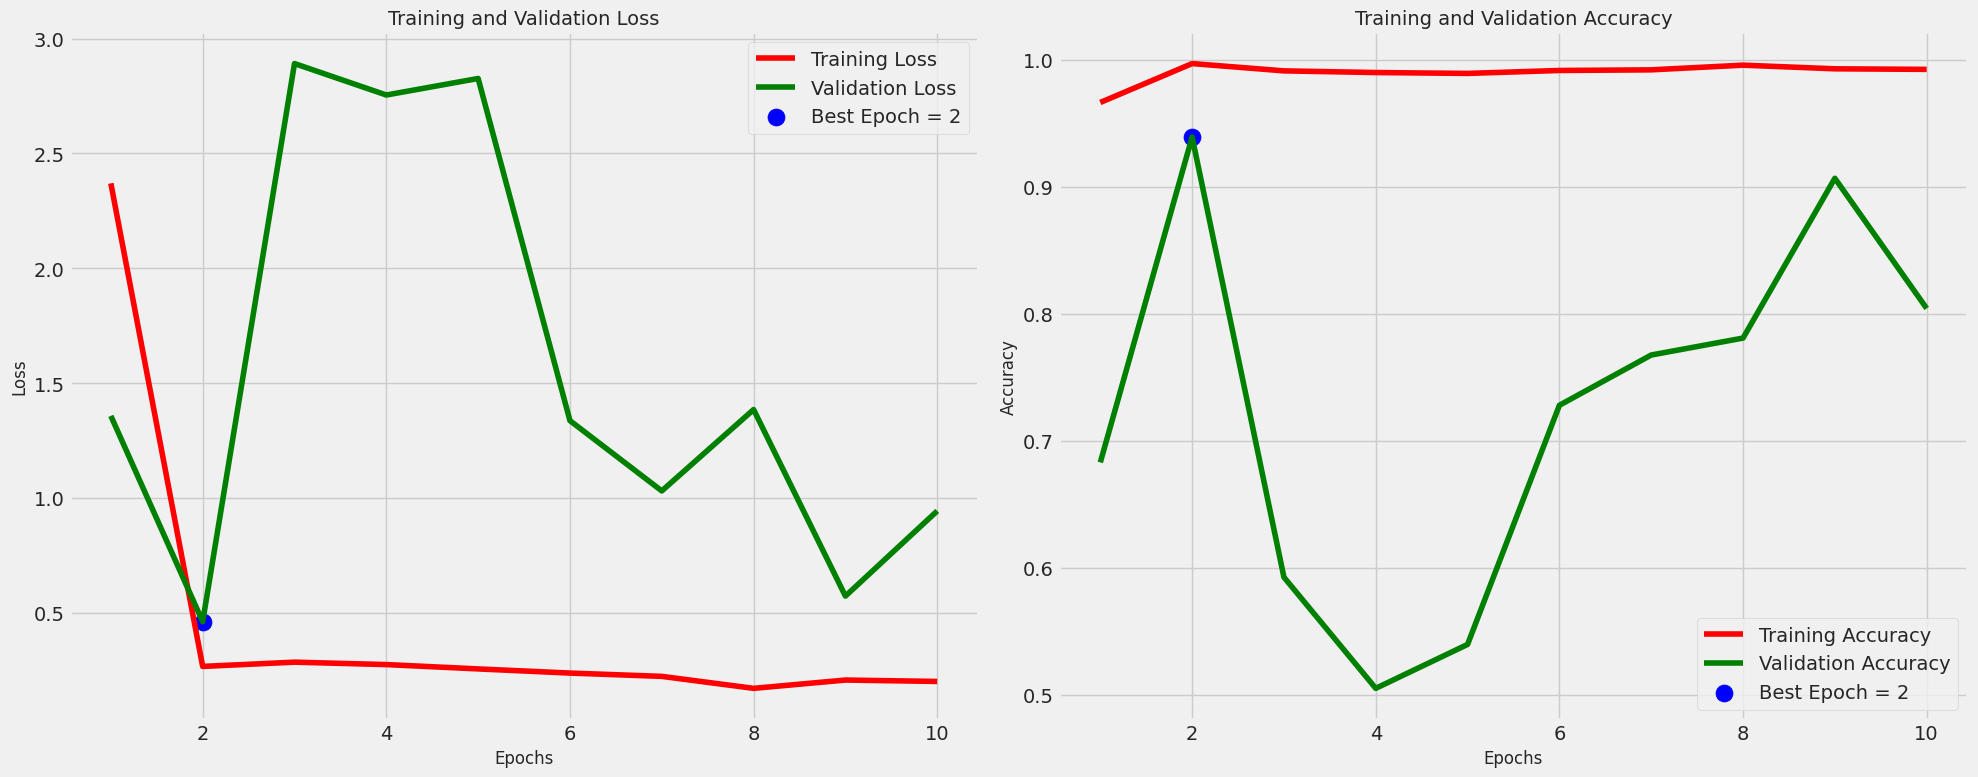

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Get metrics from history
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history.get('val_accuracy', history.history.get('val_acc'))  # compatibility
val_loss = history.history['val_loss']

# Find best epochs
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best Epoch = {index_loss + 1}'
acc_label = f'Best Epoch = {index_acc + 1}'

# Plot
plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

# --- Loss Plot
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training Loss')
plt.plot(Epochs, val_loss, 'g', label='Validation Loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

# --- Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
#plt.savefig("training_metrics.png")  # Optional: Save for Kaggle
plt.show()


**Train, test, validation accuracy & loss**

In [13]:
# Calculate optimal test batch size and steps
ts_length = len(test_df)
test_batch_size = max([ts_length // n for n in range(1, ts_length + 1) if ts_length % n == 0 and ts_length / n <= 80])
test_steps = ts_length // test_batch_size

# Evaluate model
train_score = model.evaluate(train_gen, steps=test_steps, verbose=1)
valid_score = model.evaluate(valid_gen, steps=test_steps, verbose=1)
test_score = model.evaluate(test_gen, steps=test_steps, verbose=1)

# Print results
print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]:.4f}")
print('-' * 30)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]:.4f}")
print('-' * 30)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]:.4f}")


20/20 [==============================] - 28s 1s/step - loss: 1.0103 - accuracy: 0.7919
Train Loss: 1.0637
Train Accuracy: 0.7914
------------------------------
Validation Loss: 0.9656
Validation Accuracy: 0.8086
------------------------------
Test Loss: 1.0103
Test Accuracy: 0.7919


In [14]:
preds = model.predict(test_gen, verbose=1)
y_pred = np.argmax(preds, axis=1)


20/20 [==============================] - 28s 1s/step


**Confusion Matrix**

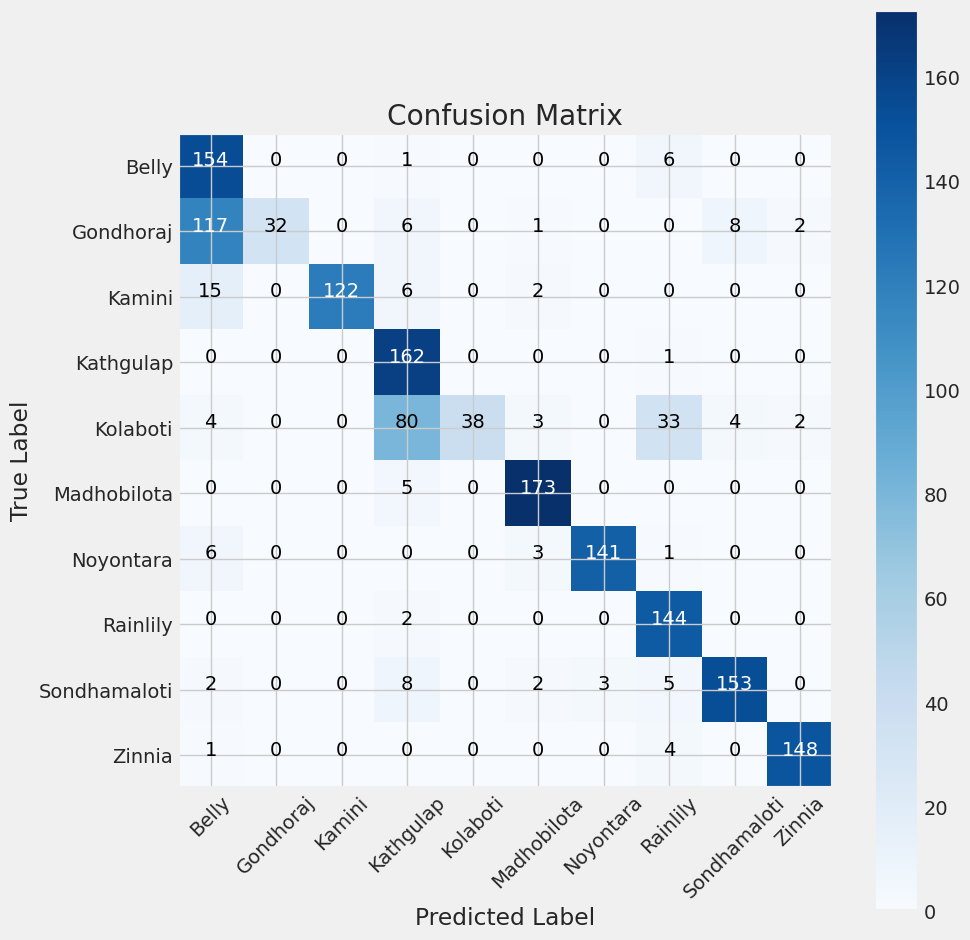

In [15]:
import itertools
from sklearn.metrics import confusion_matrix

# Class labels
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# True labels
y_true = test_gen.labels

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Annotate cells
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


**Classification Report**

In [16]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

       Belly       0.52      0.96      0.67       161
   Gondhoraj       1.00      0.19      0.32       166
      Kamini       1.00      0.84      0.91       145
   Kathgulap       0.60      0.99      0.75       163
    Kolaboti       1.00      0.23      0.38       164
 Madhobilota       0.94      0.97      0.96       178
   Noyontara       0.98      0.93      0.96       151
    Rainlily       0.74      0.99      0.85       146
Sondhamaloti       0.93      0.88      0.91       173
      Zinnia       0.97      0.97      0.97       153

    accuracy                           0.79      1600
   macro avg       0.87      0.80      0.77      1600
weighted avg       0.87      0.79      0.76      1600



**F1 Score**

In [17]:
from sklearn.metrics import f1_score

# Get true labels from the generator
y_true = test_gen.labels  # Ground truth
y_pred = np.argmax(preds, axis=1)  # If not already done

f1_per_class = f1_score(y_true, y_pred, average=None)
for cls, f1_val in zip(classes, f1_per_class):
    print(f"{cls}: {f1_val:.4f}")

# Calculate F1 scores
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

# Print the scores
print(f"Macro F1 Score: {f1_macro:.4f}")
print(f"Weighted F1 Score: {f1_weighted:.4f}")


Belly: 0.6696
Gondhoraj: 0.3232
Kamini: 0.9139
Kathgulap: 0.7483
Kolaboti: 0.3762
Madhobilota: 0.9558
Noyontara: 0.9559
Rainlily: 0.8471
Sondhamaloti: 0.9053
Zinnia: 0.9705
Macro F1 Score: 0.7666
Weighted F1 Score: 0.7631


In [18]:
model.save('MobileNet_V3.h5')

In [19]:
loaded_model = tf.keras.models.load_model('/kaggle/working/MobileNet_V3.h5', compile=False)
loaded_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [22]:
image_path = '/kaggle/input/bangladeshis-flower/Kathgulap/set1_104_vflip.jpg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = loaded_model.predict(img_array)
class_labels = classes
score = tf.nn.softmax(predictions[0])
print(f"{class_labels[tf.argmax(score)]}")

1/1 [==============================] - 0s 38ms/step
Kathgulap
